In [2]:
import sys
sys.path.append('/cluster/sj1/bb_opt/scripts')

In [3]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collect_stats as cs

%matplotlib inline

In [14]:
import collect_stats as cs

In [17]:
exp_folder = '/cluster/sj1/bb_opt/experiments/imdbwiki'
batches = [50]
num_acks = 20

In [11]:
filenames = ['wiki']

In [6]:
def sigmoid(x, exp=np.exp):
  return 1.0 / (1.0 + exp(-x))

In [6]:
arrs = {}

In [7]:
to_read = {
    'ensemble1/o_max_std_dataseed_modelseed_': [None, 'e1'],
}

In [18]:
for k in to_read:
    arrs[k] = to_read[k]
for experiment in to_read:
    print('reading', experiment)
    arrs[experiment][0] = cs.get_data(exp_folder, experiment, batches, num_samples=50)

reading ensemble1/o_max_std_dataseed_modelseed_
reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5


In [9]:
to_eval = [
    'ensemble1/o_max_std_dataseed_modelseed_',
]

In [10]:
test_rmse_fn = lambda x, filename : x['test_pred_stats']['rmse']
bs_rmse_fn = lambda x, filename : x['test_pred_stats']['baseline_rmse']
ood_rmse_fn = lambda x, filename : x['ood_pred_stats']['rmse']

In [ ]:
cs.prop_test(10, 
             filenames, 
             train_rmse_fn, 
             arrs, 
             [to_eval[6], to_eval[7]],
             19, 
             pval_threshold=0.4, 
             paired_test=True,
            )

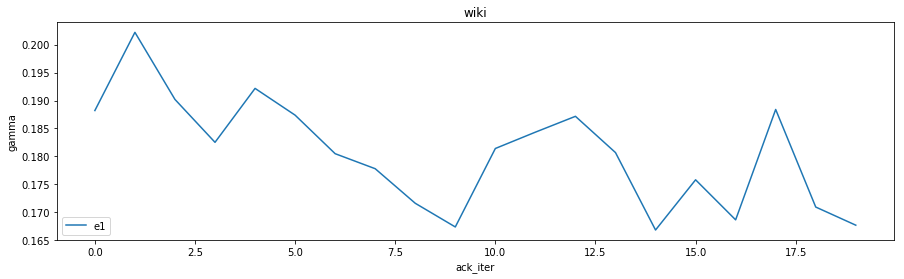

In [23]:
cs.plot_data_vs_ack_iter(
    50,
    filenames,
    'avg_seeds',
    'gamma',
    test_rmse_fn,
    20,
    arrs,
    to_eval,
    legend_loc=3,
)

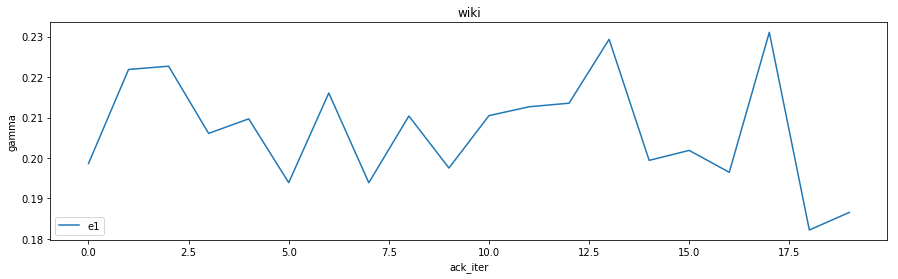

In [24]:
cs.plot_data_vs_ack_iter(
    50,
    filenames,
    'avg_seeds',
    'gamma',
    ood_rmse_fn,
    20,
    arrs,
    to_eval,
    legend_loc=3,
)